In [44]:
import pandas as pd
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [31]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [32]:
mat = df[df["Location"]=="Albury"]
mat["Date"] = pd.to_datetime(mat["Date"])


WARNING - (py.warnings._showwarnmsg) - C:\Users\ghass\AppData\Local\Temp\ipykernel_3580\200153258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mat["Date"] = pd.to_datetime(mat["Date"])



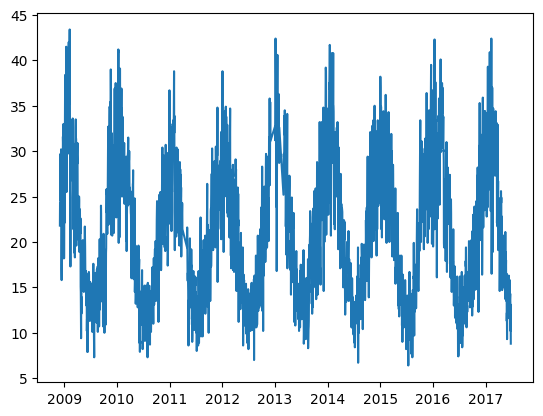

In [35]:
plt.plot(mat["Date"],mat["Temp3pm"])

In [45]:
data = mat[["Date","Temp3pm"]]
data.columns = ["ds" , "y"]
data.dropna(inplace=True)

WARNING - (py.warnings._showwarnmsg) - C:\Users\ghass\AppData\Local\Temp\ipykernel_3580\1366710598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



In [43]:
data.shape

(3032, 2)

In [50]:
model = NeuralProphet()
model.fit(df=data , freq="D", epochs=200)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.736% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (48) is too small than the required number                     for the learning rate finder (237). The results might not be optimal.
Finding best initial lr: 100%|██████████| 237/237 [00:01<00:00, 169.05it/s]


Epoch 200: 100%|██████████| 200/200 [00:00<00:00, 812.62it/s, loss=0.0226, v_num=1, MAE=2.920, RMSE=3.770, Loss=0.0231, RegLoss=0.000]   


,MAE,RMSE,Loss,RegLoss,epoch
0,24.442085,30.443779,0.553766,0.0,0
1,16.838263,21.319441,0.353793,0.0,1
2,10.171888,13.301089,0.183936,0.0,2
3,5.185753,6.726364,0.065648,0.0,3
4,3.213996,4.114413,0.027070,0.0,4
...,...,...,...,...,...
195,2.913821,3.761210,0.022974,0.0,195
196,2.904805,3.752145,0.022881,0.0,196
197,2.912858,3.766998,0.023021,0.0,197
198,2.896546,3.735994,0.022768,0.0,198


In [61]:
future = model.make_future_dataframe(data,periods=30)
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.736% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 288.98it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [62]:
forecast

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2017-06-26,None,12.664051,21.613659,-8.985559,0.035951
1,2017-06-27,None,12.725717,21.613728,-9.014763,0.126752
2,2017-06-28,None,12.437017,21.613798,-9.040851,-0.135930
3,2017-06-29,None,12.554877,21.613867,-9.064146,0.005156
4,2017-06-30,None,12.535805,21.613937,-9.084880,0.006747
5,2017-07-01,None,12.495828,21.614004,-9.103034,-0.015144
6,2017-07-02,None,12.471741,21.614075,-9.118765,-0.023570
7,2017-07-03,None,12.517508,21.614143,-9.132393,0.035756
8,2017-07-04,None,12.596975,21.614214,-9.143946,0.126707
9,2017-07-05,None,12.324866,21.614283,-9.153497,-0.135920
